In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## 1. Import The Data 

In [2]:
# import the data 
data = pd.read_csv('Spotify_Data.csv')
# select the data from 2010's and above 
data = data[data['year'] >= 2010].reset_index()
data = data.drop( columns = ['index'])
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.022200,['Tame Impala'],0.450,362880,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,1,Expectation,48,2010-05-21,0.0570,139.925,0.1610,2010
1,0.000103,['Bring Me The Horizon'],0.382,274133,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,1,It Never Ends,50,2010-10-05,0.0872,105.032,0.1280,2010
2,0.852000,['Daft Punk'],0.179,162120,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,1,Solar Sailer,48,2010-01-01,0.0394,124.266,0.0399,2010
3,0.080900,['TobyMac'],0.507,266547,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,1,City On Our Knees,48,2010-02-05,0.0424,155.945,0.4820,2010
4,0.002960,['Kenny Chesney'],0.315,210640,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,1,Reality,47,2010-09-28,0.1170,185.305,0.4150,2010


In [3]:
# checking basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      21656 non-null  float64
 1   artists           21656 non-null  object 
 2   danceability      21656 non-null  float64
 3   duration_ms       21656 non-null  int64  
 4   energy            21656 non-null  float64
 5   explicit          21656 non-null  int64  
 6   id                21656 non-null  object 
 7   instrumentalness  21656 non-null  float64
 8   key               21656 non-null  int64  
 9   liveness          21656 non-null  float64
 10  loudness          21656 non-null  float64
 11  mode              21656 non-null  int64  
 12  name              21656 non-null  object 
 13  popularity        21656 non-null  int64  
 14  release_date      21656 non-null  object 
 15  speechiness       21656 non-null  float64
 16  tempo             21656 non-null  float6

## 2. Dealing with Missing Value and Missing Value

In [4]:
# count missing value 
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [5]:
# duplocate value 
data.duplicated().sum()

0

## 3. Data Preprocessing 

In [6]:
# changing artist's row name 
data['artists'] = data['artists'].str.strip("['']")
# recheck data
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.022200,Tame Impala,0.450,362880,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,1,Expectation,48,2010-05-21,0.0570,139.925,0.1610,2010
1,0.000103,Bring Me The Horizon,0.382,274133,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,1,It Never Ends,50,2010-10-05,0.0872,105.032,0.1280,2010
2,0.852000,Daft Punk,0.179,162120,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,1,Solar Sailer,48,2010-01-01,0.0394,124.266,0.0399,2010
3,0.080900,TobyMac,0.507,266547,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,1,City On Our Knees,48,2010-02-05,0.0424,155.945,0.4820,2010
4,0.002960,Kenny Chesney,0.315,210640,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,1,Reality,47,2010-09-28,0.1170,185.305,0.4150,2010


## 4. EDA

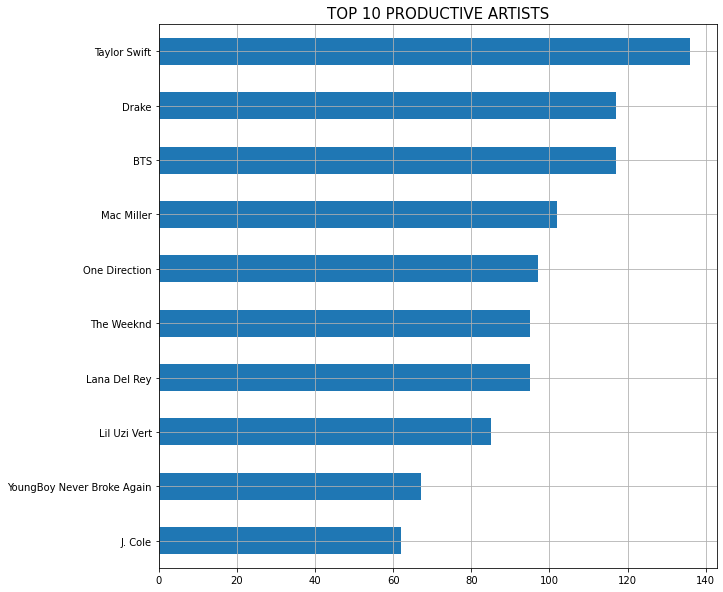

In [7]:
# finding most productive artists
data['artists'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,10))
plt.title("TOP 10 PRODUCTIVE ARTISTS", fontsize=15)
plt.grid()

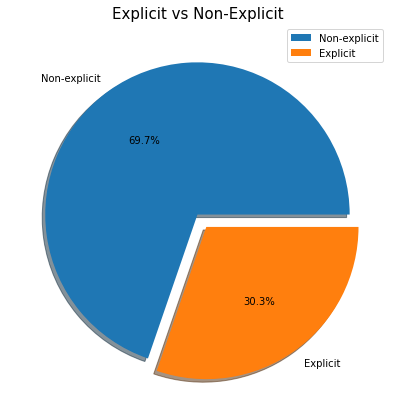

In [8]:
# Explicit and non-explicit song
def explicit_convert(number):
    if number == 1:
        return 'Explicit'
    else:
        return 'Non-explicit'
data['explicit_str'] = [explicit_convert(i) for i in data['explicit']]
# Visualize
plt.rcParams['figure.figsize'] = (7, 7)
labels=['Non-explicit', 'Explicit']
plt.pie(data['explicit_str'].value_counts(), explode=(0,0.1), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Explicit vs Non-Explicit', fontsize = 15)
plt.axis('off')
plt.legend()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      21656 non-null  float64
 1   artists           21656 non-null  object 
 2   danceability      21656 non-null  float64
 3   duration_ms       21656 non-null  int64  
 4   energy            21656 non-null  float64
 5   explicit          21656 non-null  int64  
 6   id                21656 non-null  object 
 7   instrumentalness  21656 non-null  float64
 8   key               21656 non-null  int64  
 9   liveness          21656 non-null  float64
 10  loudness          21656 non-null  float64
 11  mode              21656 non-null  int64  
 12  name              21656 non-null  object 
 13  popularity        21656 non-null  int64  
 14  release_date      21656 non-null  object 
 15  speechiness       21656 non-null  float64
 16  tempo             21656 non-null  float6

In [10]:
# Analyse statistical behaviour of the feature variables 
feature = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness'
          ,'tempo','valence']

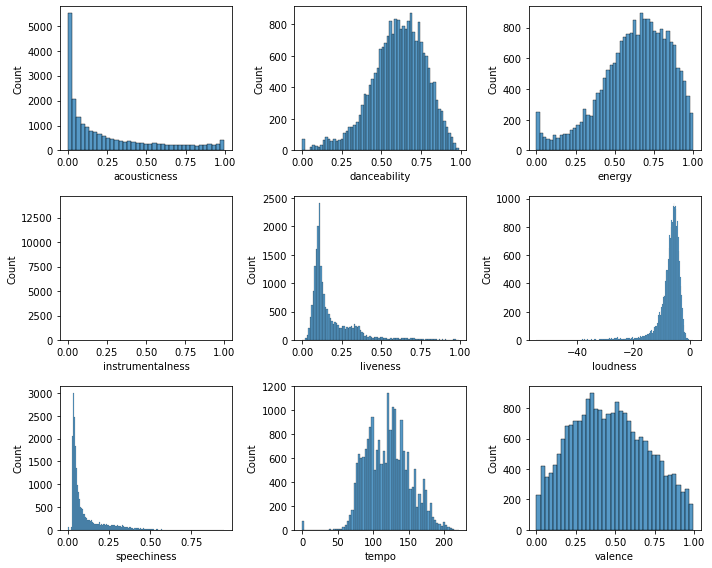

In [11]:
# distribution 
plt.figure(figsize = (10,8))
for i in range (0, len(feature)):
    plt.subplot(3, len(feature)/3, i+1)
    sns.histplot(data[feature[i]])
    plt.tight_layout()

we have to normalize the data 

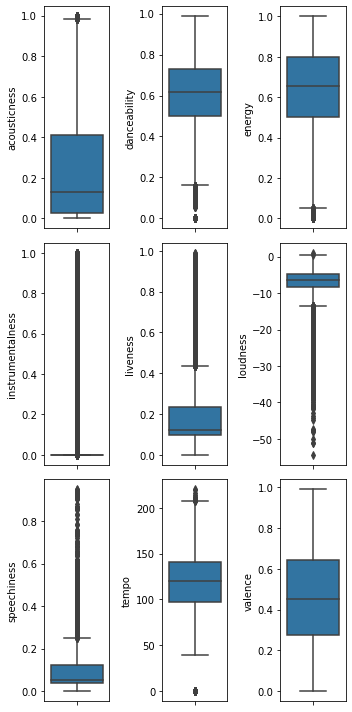

In [12]:
# outliers 
plt.figure(figsize = (5,10))
for i in range (0, len(feature)):
    plt.subplot(3, len(feature)/3, i+1)
    sns.boxplot(y = data[feature[i]])
    plt.tight_layout()

Instrumentalness, Liveness, Loudness, speechiness, and tempo need to be cleaned from outliers 

## 5. Dealing With Outliers 

In [13]:
# get rid of outliers using IQR method
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [14]:
# removing outliers 
step_1 = remove_outlier(data, 'instrumentalness')
step_2 = remove_outlier(step_1, 'liveness')
step_3 = remove_outlier(step_2, 'loudness')
step_4 = remove_outlier(step_3, 'speechiness')
step_5 = remove_outlier(step_4, 'tempo')
cleaned_data = step_5
cleaned_data[feature]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1,0.000103,0.382,0.943,0.000110,0.3960,-5.434,0.0872,105.032,0.128
3,0.080900,0.507,0.770,0.000000,0.2140,-5.018,0.0424,155.945,0.482
6,0.627000,0.778,0.468,0.000000,0.0899,-4.838,0.0529,122.326,0.967
9,0.002010,0.269,0.904,0.000000,0.3120,-5.715,0.1880,177.423,0.346
11,0.043500,0.517,0.846,0.000000,0.1770,-4.332,0.0346,89.912,0.683
...,...,...,...,...,...,...,...,...,...
21649,0.022700,0.619,0.719,0.000000,0.0839,-4.111,0.1570,86.036,0.351
21650,0.210000,0.795,0.585,0.000001,0.1120,-4.451,0.0374,97.479,0.934
21651,0.173000,0.875,0.443,0.000032,0.0891,-7.461,0.1430,100.012,0.306
21654,0.071400,0.646,0.761,0.000000,0.2220,-2.557,0.0385,129.916,0.472


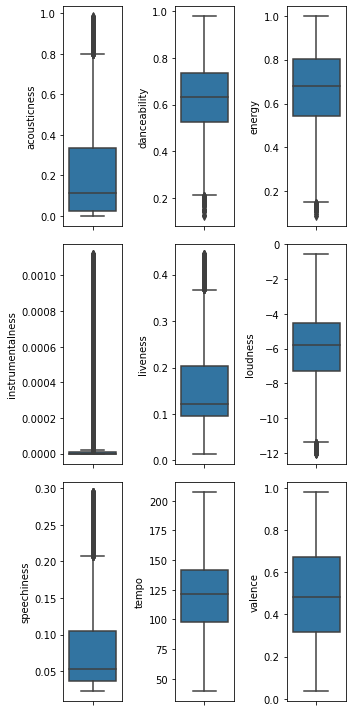

In [15]:
# recheck outliers using boxplot 
plt.figure(figsize = (5,10))
for i in range (0, len(feature)):
    plt.subplot(3, len(feature)/3, i+1)
    sns.boxplot(y = cleaned_data[feature[i]])
    plt.tight_layout()

## 6. Normalization 

In [16]:
# import libraries 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
# define x (input data )
x = cleaned_data[feature]
# scalling 
minmax_dat = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_dat, columns=feature)
minmax_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.000101,0.302108,0.940561,0.098214,0.888164,0.575580,0.236871,0.390017,0.098110
1,0.082129,0.448478,0.750138,0.000000,0.464119,0.611887,0.072347,0.693015,0.471961
2,0.636547,0.765808,0.417722,0.000000,0.174977,0.627596,0.110907,0.492939,0.984159
3,0.002037,0.169789,0.897633,0.000000,0.692451,0.551056,0.607051,0.820837,0.328335
4,0.044159,0.460187,0.833792,0.000000,0.377912,0.671758,0.043702,0.300034,0.684233
...,...,...,...,...,...,...,...,...,...
13963,0.023042,0.579625,0.694001,0.000000,0.160997,0.691046,0.493206,0.276967,0.333615
13964,0.213195,0.785714,0.546505,0.001071,0.226468,0.661372,0.053985,0.345067,0.949308
13965,0.175632,0.879391,0.390204,0.028929,0.173113,0.398673,0.441792,0.360142,0.286091
13966,0.072484,0.611241,0.740231,0.000000,0.482759,0.826671,0.058024,0.538109,0.461400


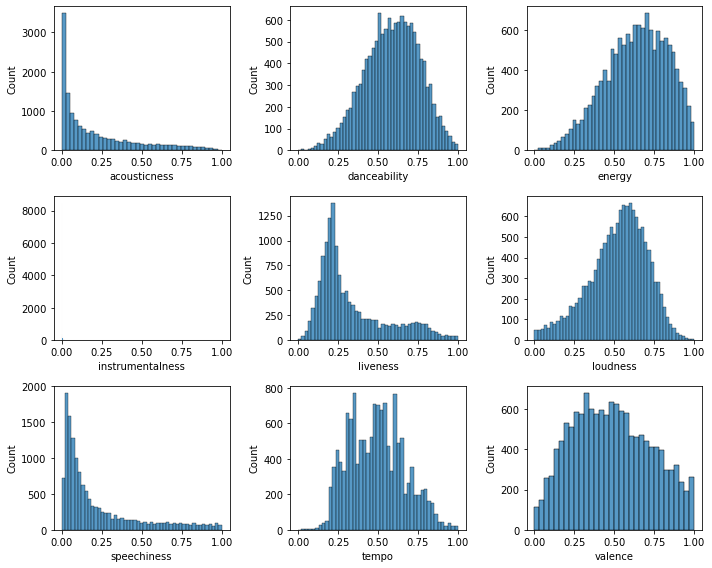

In [18]:
# recheck distribution after scalling 
plt.figure(figsize = (10,8))
for i in range (0, len(feature)):
    plt.subplot(3, len(feature)/3, i+1)
    sns.histplot(minmax_df[feature[i]])
    plt.tight_layout()

## 7. Recommendation

In [19]:
# import libraries 
from sklearn.metrics.pairwise import cosine_similarity
# cosine similarities 
cosine_sim = cosine_similarity(minmax_dat,minmax_dat)
cosine_sim

array([[1.        , 0.88450298, 0.56937143, ..., 0.68013204, 0.87933584,
        0.790033  ],
       [0.88450298, 1.        , 0.82407319, ..., 0.80475213, 0.97991156,
        0.94342737],
       [0.56937143, 0.82407319, 1.        , ..., 0.83077126, 0.83713808,
        0.91737142],
       ...,
       [0.68013204, 0.80475213, 0.83077126, ..., 1.        , 0.83964005,
        0.88828637],
       [0.87933584, 0.97991156, 0.83713808, ..., 0.83964005, 1.        ,
        0.97453208],
       [0.790033  , 0.94342737, 0.91737142, ..., 0.88828637, 0.97453208,
        1.        ]])

In [69]:
# show the reccomendation 
indices = pd.Series(data['name'])
def recommended_songs(title):
    # songs
    songs=[]
    idx = indices[indices == title].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # take top-10 songs
    top_10 = sort_index.iloc[1:11]
    for i in top_10.index:
        songs.append(indices[i])
    final_df = pd.DataFrame(songs, columns = ['title'], index = list(range(1,11)))
    return final_df

In [70]:
recommended_songs('Beautiful')

,title
1,Beautiful
2,Wanted
3,"A Whole New World (End Title) - From ""Aladdin"""
4,Countryside
5,Riptide
6,Freedom
7,(Theme From) Red Dead Redemption
8,Might Not Be OK (feat. Big K.R.I.T.)
9,Thru These Tears
10,Faithful


In [71]:
recommended_songs('Pony')

,title
1,Your Love
2,Bottoms Up
3,Para Estar
4,Algo Grande Viene
5,Little Willy
6,Ascension
7,Drip Too Hard (Lil Baby & Gunna)
8,Dose of Reality
9,Chamber Of Reflection
10,Ric Flair Drip (& Metro Boomin)
